# Flower Classification EDA and PCA - Iris Extended Dataset

## In this project I explored species feature variation within (intra) and between (inter) three species of Iris found in North America. The results can be used for species classification and further development of Machine Learning models for classification. 

### Technical skills: Data Exploration, PCA, and Visualization


Background on the genus:

Iris is a genus of about 300 species in the monocot plant family Iridaceae. Plants within the genus are perennial, with grasslike leaves and showy flowers which are highly valued in the horticultural industry. The flowers consist of three petal-looking sepals which are usually spreading downwards, three (sometimes reduced) upright petals, and three broad pollen-receptive stigma branches. Most of the species within the genus are distributed in the temperate Northern Hemisphere where they predominantly are found in dry, semi-desert, or colder rocky mountainous areas. (souce: Wikipedia.com) 

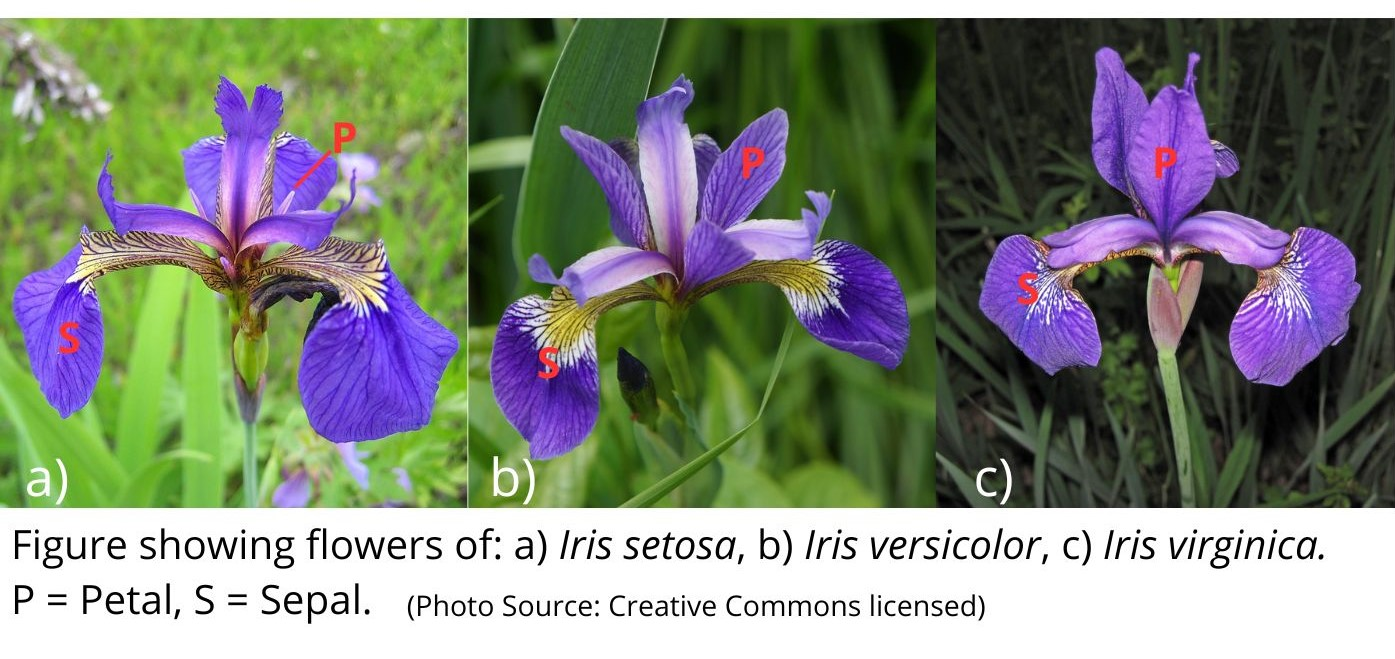


### The dataset is downloaded from Kaggle (https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended/) and includes elevation, soil-type and morphological data from three species of Iris:

Iris setosa.
Native to:
Alaska, Aleutian Is., Amur, British Columbia, Irkutsk, Japan, Kamchatka, Khabarovsk, Korea, Krasnoyarsk, Kuril Is., Magadan, Manchuria, North European Russi, Primorye, Sakhalin, Yakutskiya, Yukon

Iris versicolor.
Native to: Central & E. Canada to N. Central & E. U.S.A. 
-rhizomatous geophyte, grows primarily in the temperate biome.

  
Iris virginica.    
Native to: E. Canada to Central & E. U.S.A. 
-rhizomatous geophyte, grows primarily in the temperate biome.

(source:plantsoftheworld.org)

 
### Takeaways:

### There is a clear morphological differentiation between I. setosa and the two other species I. virginica, and I. versicolor.  - I. setosa can easily be differentiated from the two other species due to a significantly smaller petal size. I. versicolor possesses indermediate features of I. setosa, and I. virginica, but are closer to the latter, with which it overlaps in all of the measurements. 

### By looking at the petals alone, it is possible to distinguish the majority of I. virginica and I. veriscolor plants. However, due to overlap, it will create a significant classification error. By including more features in the classification, the accurracy can be improved.

In [200]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches


#plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
#plt.style.use('seaborn-v0_8-dark')
sns.set_style('white')

In [201]:
# Import data
data = pd.read_csv(r"C:\Users\Tori\Downloads\flowerset\iris_extended.csv")

In [202]:
data

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,9.000000,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,virginica,268.8,loamy,5.36,2.51,5.16,1.93,13.4536,9.9588,2.135458,2.673575,1.038760,1.300518,0.20,0.58,11.61,11.52,59.46,3.667915,3.155757,1.350926
1196,virginica,125.4,clay,7.49,3.06,7.68,2.17,22.9194,16.6656,2.447712,3.539171,0.975260,1.410138,-0.19,0.89,13.85,6.99,77.12,4.787421,4.082352,1.375252
1197,virginica,73.6,clay,6.79,3.25,4.72,2.26,22.0675,10.6672,2.089231,2.088496,1.438559,1.438053,2.07,0.99,13.13,9.16,74.39,4.697606,3.266068,2.068725
1198,virginica,239.6,sandy,6.38,2.24,5.30,1.71,14.2912,9.0630,2.848214,3.099415,1.203774,1.309942,1.08,0.53,11.01,6.46,73.90,3.780370,3.010482,1.576873


In [203]:
# Check of missing values
data.isnull().sum() # No missing values

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

In [204]:
# Check datatypes for columns
print(data.dtypes)  # Mostly numerial values

species                             object
elevation                          float64
soil_type                           object
sepal_length                       float64
sepal_width                        float64
petal_length                       float64
petal_width                        float64
sepal_area                         float64
petal_area                         float64
sepal_aspect_ratio                 float64
petal_aspect_ratio                 float64
sepal_to_petal_length_ratio        float64
sepal_to_petal_width_ratio         float64
sepal_petal_length_diff            float64
sepal_petal_width_diff             float64
petal_curvature_mm                 float64
petal_texture_trichomes_per_mm2    float64
leaf_area_cm2                      float64
sepal_area_sqrt                    float64
petal_area_sqrt                    float64
area_ratios                        float64
dtype: object


In [205]:
# Find duplicates
print("Number of duplicated rows:",data.duplicated(keep=False).sum()) # No duplicated found in the dataset

Number of duplicated rows: 0


In [206]:
#Shape of table
data.shape

(1200, 21)

In [207]:
data.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,17.870807,5.689068,2.003853,4.016732,1.996762,5.422667,2.08795,1.863317,8.355267,15.052733,60.144650,4.208441,2.106480,15.755674
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.388978,4.585312,0.507508,2.070668,1.035622,5.921786,1.27443,1.004847,3.172975,4.663109,10.224305,0.399956,1.119309,21.891577
min,50.100000,4.040000,1.700000,0.960000,0.050000,9.048000,0.086000,0.978774,1.587379,0.745902,0.841121,-1.55000,-0.340000,3.310000,3.830000,35.160000,3.007989,0.293258,0.818662
25%,110.875000,5.210000,2.690000,1.640000,0.360000,15.554550,0.565825,1.639104,2.855016,1.223277,1.650452,1.14000,1.090000,5.310000,11.280000,52.302500,3.943926,0.752213,2.005655
50%,171.300000,5.840000,3.030000,4.300000,1.290000,17.646400,5.525400,1.970738,3.448642,1.442773,2.170656,1.95500,1.590000,7.925000,15.020000,59.170000,4.200762,2.350617,3.059424
75%,239.125000,6.520000,3.390000,5.200000,1.740000,20.007275,9.256725,2.293932,4.486058,3.059940,9.251453,3.29000,2.740000,10.715000,18.527500,67.305000,4.472949,3.042487,30.764892
max,299.900000,9.120000,4.760000,7.840000,2.990000,29.722600,23.128000,4.082902,34.400000,5.410000,55.800000,4.66000,4.560000,17.890000,29.850000,86.930000,5.451844,4.809158,183.620930


In [208]:
data.value_counts("species") # Balanced dataset

species
setosa        400
versicolor    400
virginica     400
dtype: int64

# Exploratory Analysis

# Environmental Factors

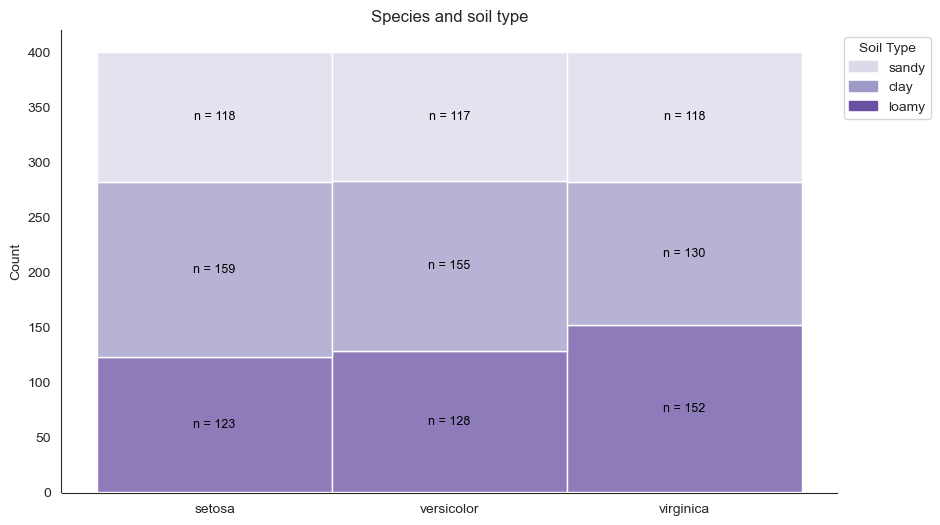

In [199]:
# Check for preference for a certain soil type amoung the species
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram plot 
sns.histplot(data=data, x='species', hue='soil_type', palette='Purples', multiple="stack", edgecolor='white', ax=ax)

# Annotate counts
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    count = int(height)  # Convert height to integer for count
    if height > 0:
        ax.text(x + width/2, y + height/2, f'n = {count}', ha='center', va='center', color='black', fontsize=9)

# Creating a custom legend
legend_colors = sns.color_palette('Purples', n_colors=len(data['soil_type'].unique()))
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, data['soil_type'].unique())]
ax.legend(handles=legend_handles, title='Soil Type', bbox_to_anchor=(1, 1), loc='upper left')

# Set title and despine plot
ax.set_title("Species and soil type")
ax.set_ylabel("Count")
ax.set_xlabel("")
sns.despine(offset=1, trim=False)

plt.show()


### All three species are found in all three soiltypes.

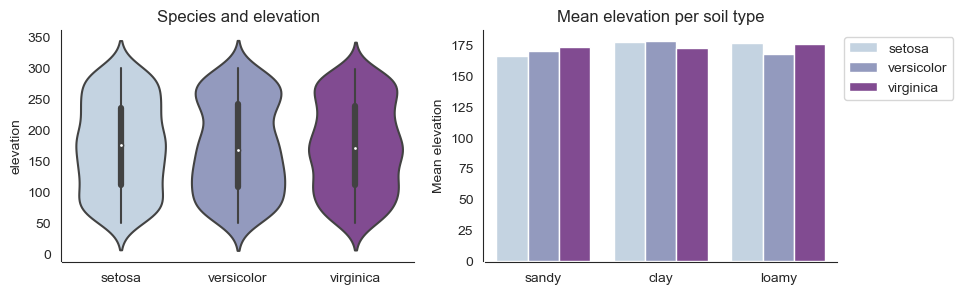

In [131]:
# Check for paterns in elevation in the dataset-> violin plot
# Check if there is a difference in which soil type the species are foud in based on elevation ->  Bar plot

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 3))

# Plot 1, violin plot
ax1 = sns.violinplot(data = data, y = "elevation", x = "species", palette = "BuPu", ax = axs[0])
ax1.set_title("Species and elevation")
ax1.set_xlabel("")


# Plot 2, bar plot
ax2 = sns.barplot(data = data, x = "soil_type", y = "elevation", hue = "species", palette = "BuPu", errorbar=None, ax = axs[1])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')

ax2.set_title("Mean elevation per soil type")
ax2.set_ylabel("Mean elevation")
ax2.set_xlabel("")


sns.despine(offset=1, trim=False)

plt.show()


### The species can be found within the same elevation range.
### The soil type seems to de independent of the elevation.
### -> Soil type and elevation are not good indicators of species in the dataset.

# Numerical variance within and between the species 

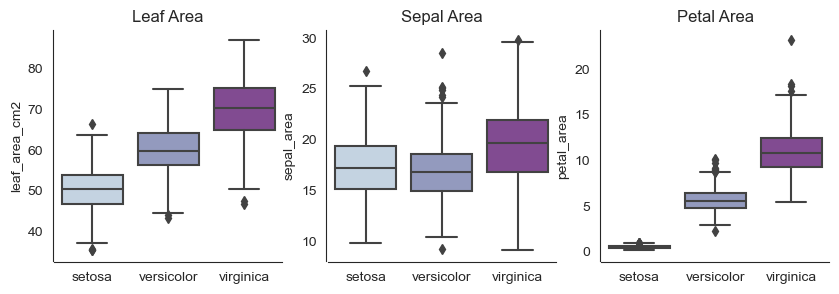

In [126]:
# Investigate the difference in leaf area, sepal area, and petal area among the three species

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 3))

# Creating box plots
ax1 = sns.boxplot(data = data, x = 'species', y = 'leaf_area_cm2', palette = 'BuPu' , ax = axs[0] )
ax1.set_xlabel('')
ax1.set_title('Leaf Area')

ax2 = sns.boxplot(data = data, x = 'species', y = 'sepal_area', palette = 'BuPu' , ax = axs[1] )
ax2.set_xlabel('')
ax2.set_title('Sepal Area')

ax3 = sns.boxplot(data = data, x = 'species', y = 'petal_area', palette = 'BuPu' , ax = axs[2] )
ax3.set_xlabel('')
ax3.set_title('Petal Area')

# Remove the top and right spines from the plot and add some space between the spines and the axes
sns.despine(offset=1, trim=False)

plt.show()


### Leaf Area: Leaf area varies among the species with I. setosa having the smallest leaves and I. virginica the biggest. I. versicolor shows intermediate leaf size of the two other species.

### Sepal Area: Sepal area is not a good indicator of species as the values are greatly overlapping.

### Petal Area: I. setosa can be distinguished from the two other species based on petal area. I. versicolor display intermediate values. However, there is an overlap between I. versicolor and I virginica. Petal area is therefore not a good classifier alone to distinguish I. versicolor and I. virginica. 

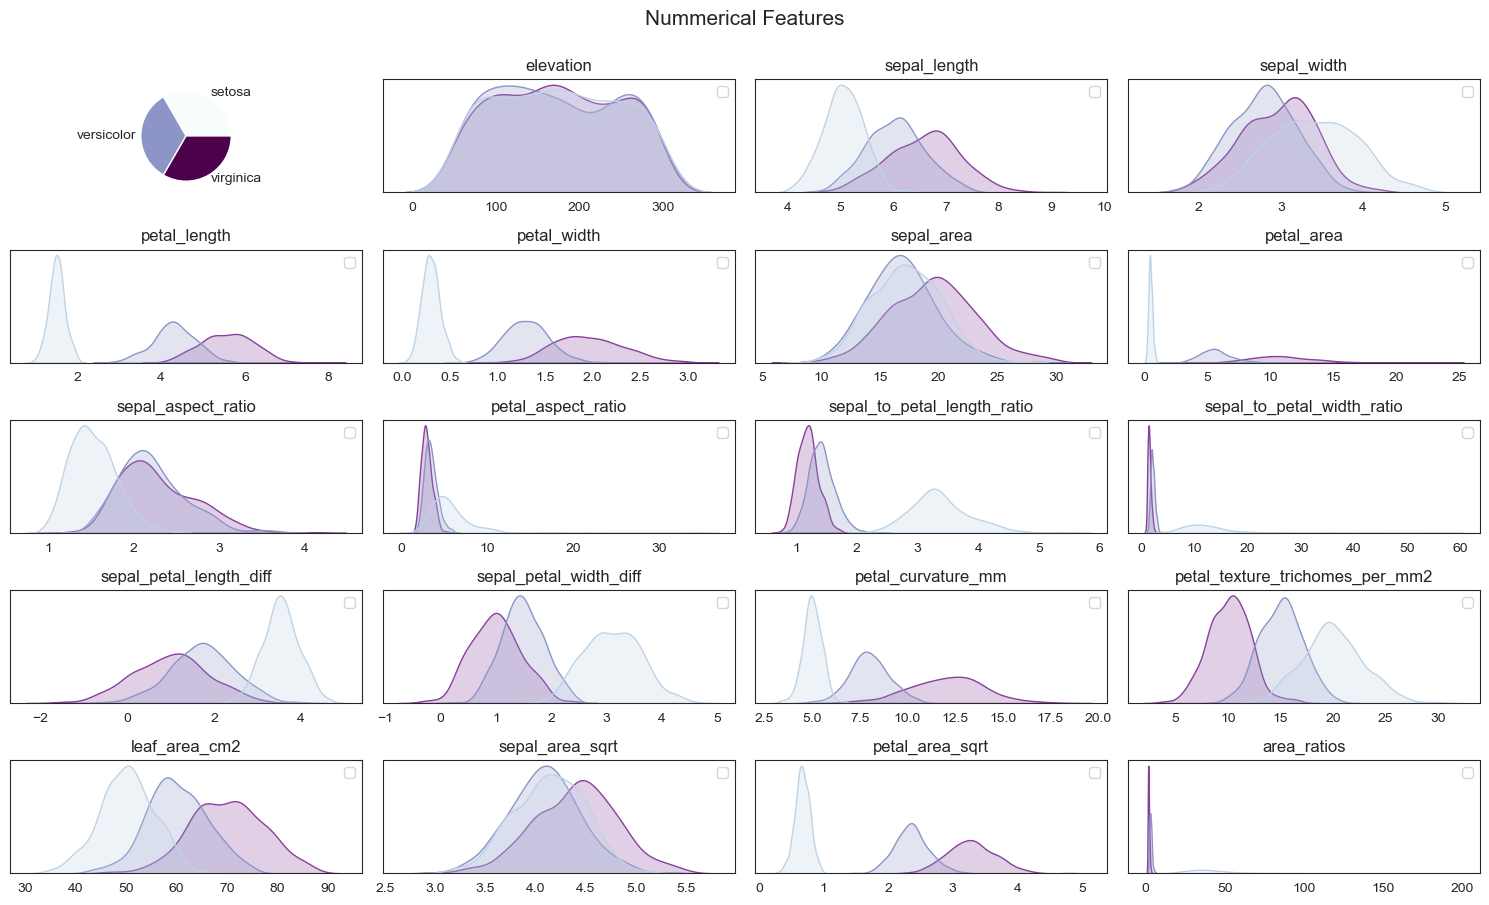

In [218]:
# Investigate the distribution of all numerical features in the dataset

plt.figure(figsize=(15,9))
num_data = data.drop(['species','soil_type'], axis=1)
plt.subplot(5,4,1)

# Pie plot, species distrubution
data.species.value_counts().plot.pie(cmap ='BuPu')
plt.ylabel('')

# kde-plot for numerical features
for i, feature in enumerate(num_data):
    plt.subplot(5,4,i+2)
    #sns.boxenplot(x=df_raw[feature], y=df_raw.species)
    sns.kdeplot(data, x=data[feature], hue='species', fill=True, palette ='BuPu')
    plt.ylabel('')
    plt.yticks([])
    plt.xlabel('')
    plt.legend('')
    plt.title(feature)
    
# Adding a main title for all subplots
plt.suptitle('Nummerical Features', fontsize=15, x = 0.5, y = 1.0)
    
plt.tight_layout() 

plt.show()


### It is clear that the morphological features of I. setosa differ from the two other species, having the smallest petals with the most trichomes(hairs), and the smallest leaf size. I. versicolor overall displays intermediate features that are greatly overlapping with those of I. virginica. From the plots, I. versicolor and I. virgica are best differenced by petal lenght, petal width and area, petal curvature, and amount of trichomes.

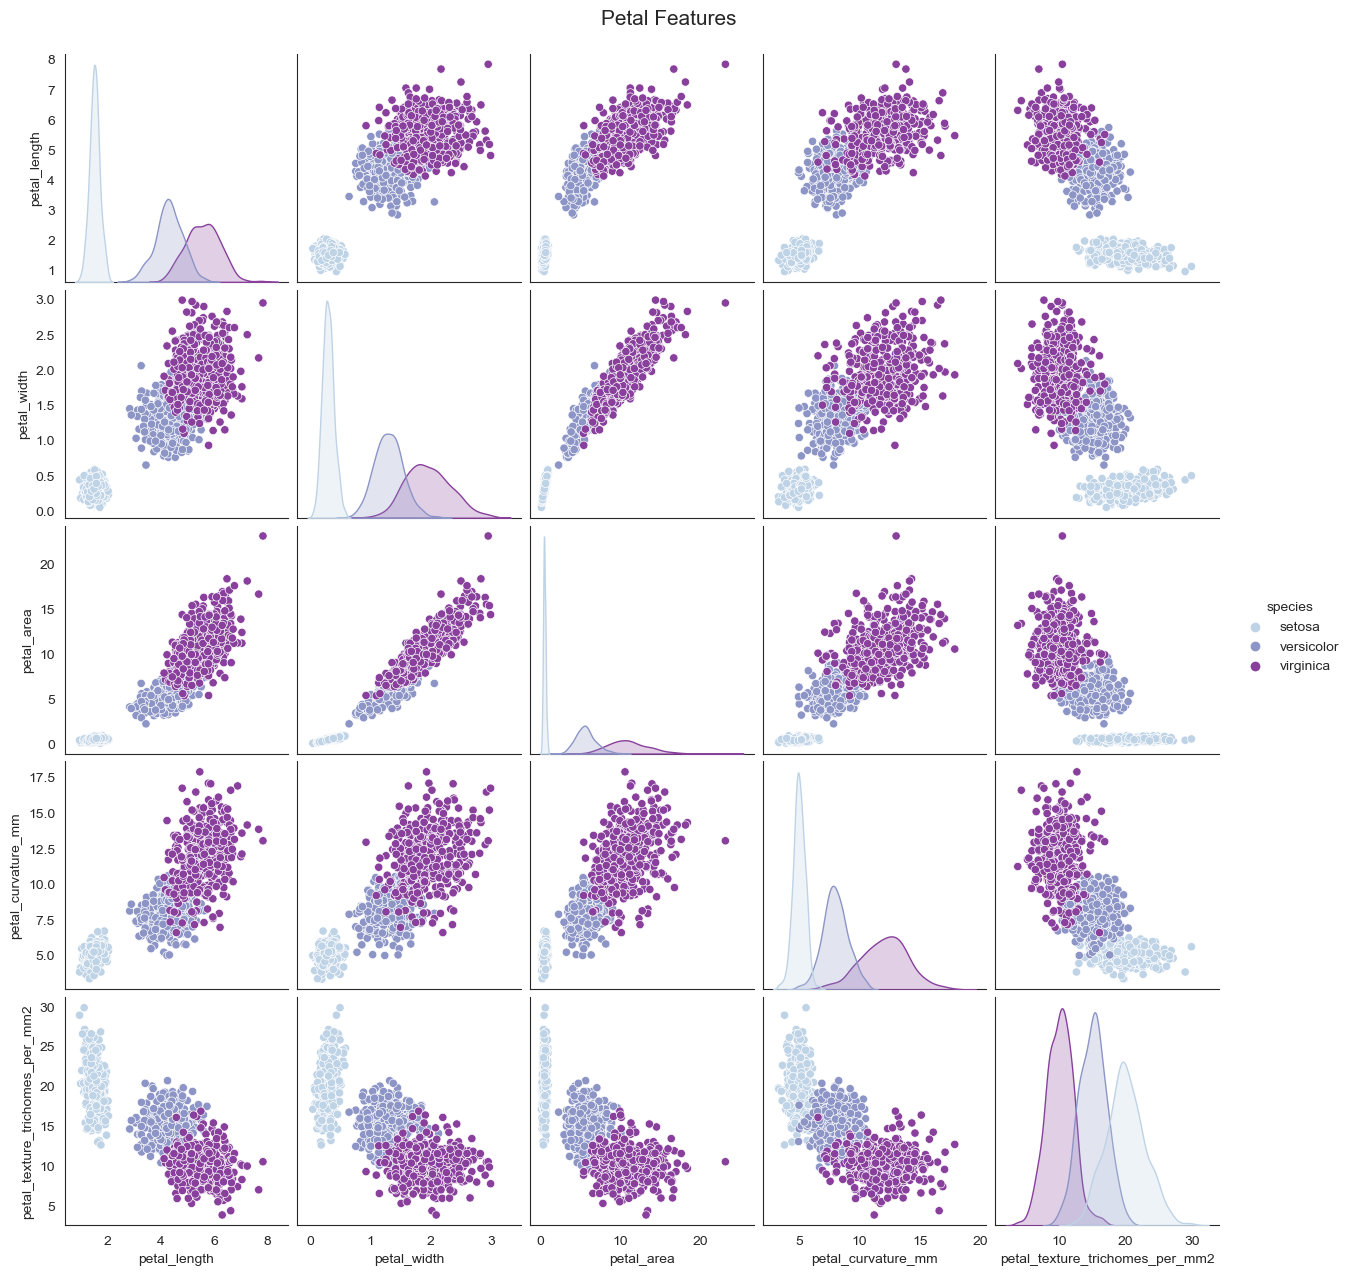

In [219]:
# Taking a better look at the petal features

# Making a pair-plot to show varience in petal features wihin and between the species
data_petal = data[['species','petal_length', 'petal_width','petal_area', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2' ]]
sns.pairplot(data = data_petal, hue = 'species', palette ='BuPu')

# Adding a main title for all subplots
plt.suptitle('Petal Features', fontsize=15, x = 0.5, y = 1.02)

plt.show()

# Correlations between the nummerical features

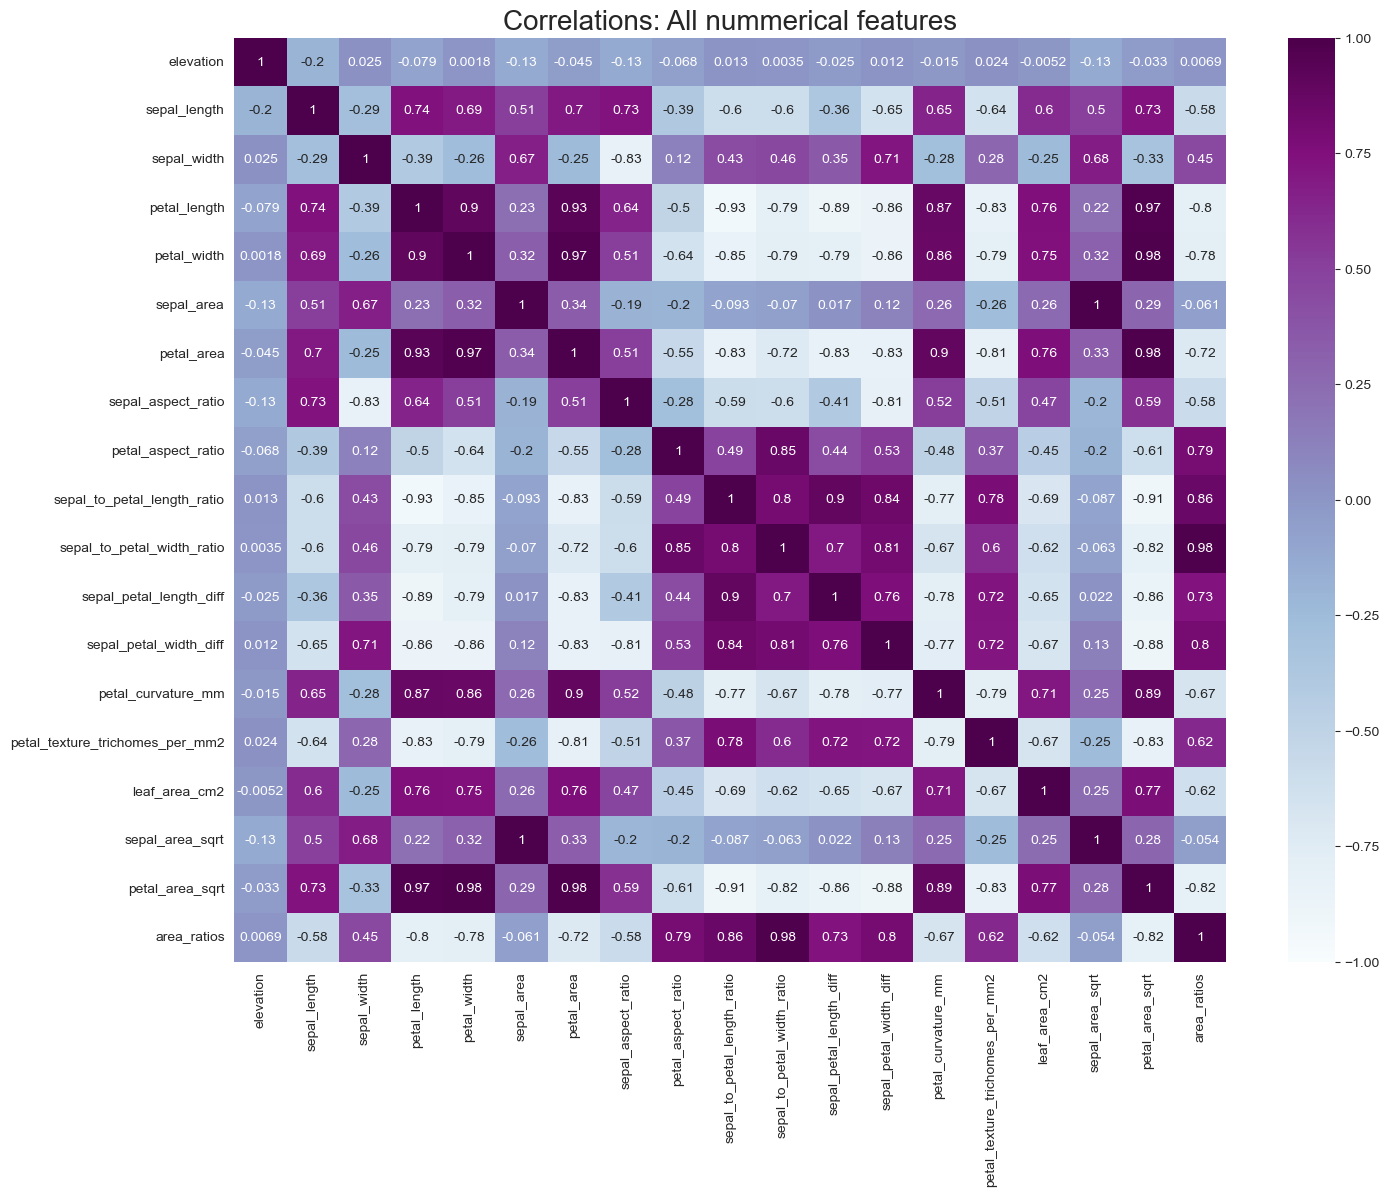

In [132]:
# Exploring correlations between all nummerical features in the dataset. Plotting a heatmap. 
plt.figure(figsize=(16,12))
df_corr = data.corr(numeric_only=True)
ax = sns.heatmap(df_corr, annot=True,cmap='BuPu', vmin=-1, vmax=1)

ax.set_title('Correlations: All nummerical features', size = 20)

plt.show()

### The closer the value is to 1, the greater positive correlation between the features, and the greater negative correlation the closer to -1.  We can see that many of the features show a positive correlation. 

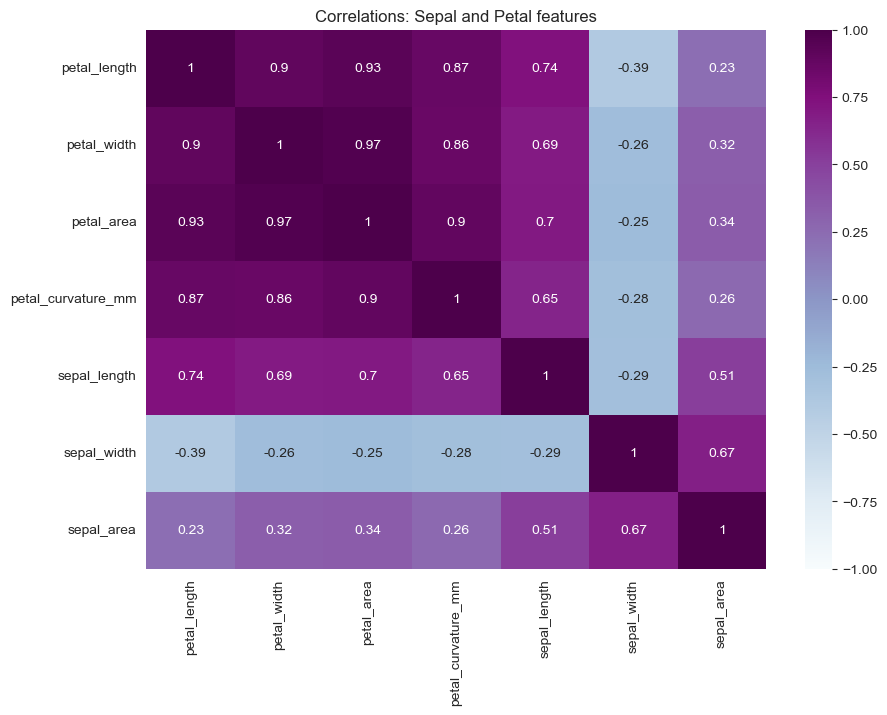

In [135]:
# Ploting a heatmap showing correlation for flower features (sepal and petal)
data_heat = data[['petal_length', 'petal_width','petal_area', 'petal_curvature_mm','sepal_length', 'sepal_width','sepal_area']]
plt.figure(figsize=(10,7))
ax =sns.heatmap(data_heat.corr(), annot=True,cmap='BuPu', vmin=-1, vmax=1) 

ax.set_title('Correlations: Sepal and Petal features')

plt.show()

### The petal features are more strongly correlated than the sepal features. 
### We can observe strong positive correlations( r > 0.75) between the petal features, and moderate correlation between sepal lenght and petal features(r > 0.50).

# PCA, All numerical features 

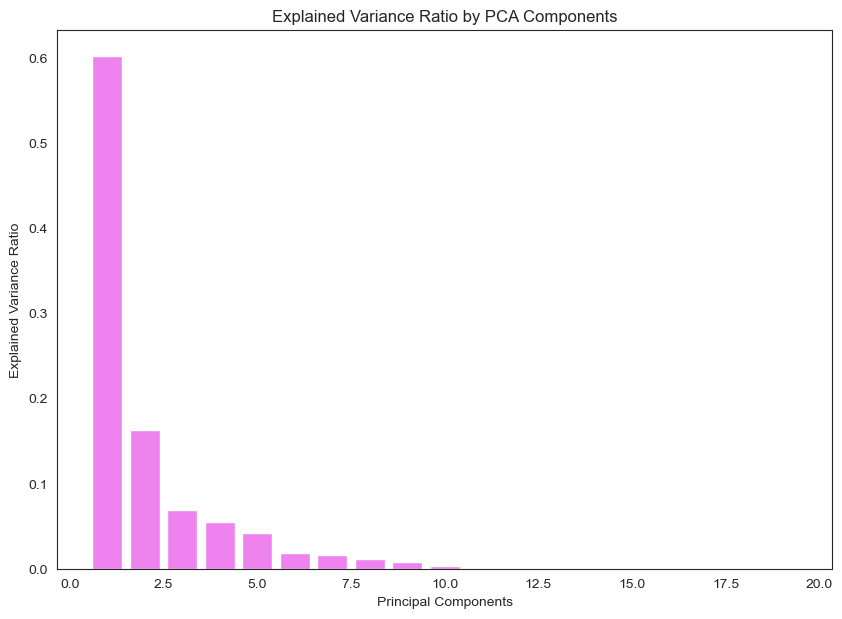

In [220]:
# The daset have many nummerical variables, and therefor many dimentions. 
# By doing a PCA analysis, I will reduce the dementinallity in the data and make the data two demential.

# Selecting numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64'])
pca_data = data[numerical_features.columns]

# Standardizing the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Applying PCA
pca = PCA()
pca.fit(pca_data_scaled)

# Before reducing the demetionality, I am making a plot to show the explained variance by each PCA component. 

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Cumulative Variance Explained
cumulative_variance = np.cumsum(explained_variance)

# Explained variance ratio plot
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='violet')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by PCA Components')
plt.show()


### We can see that the first components explains the great majority of the variance wihin the data. 

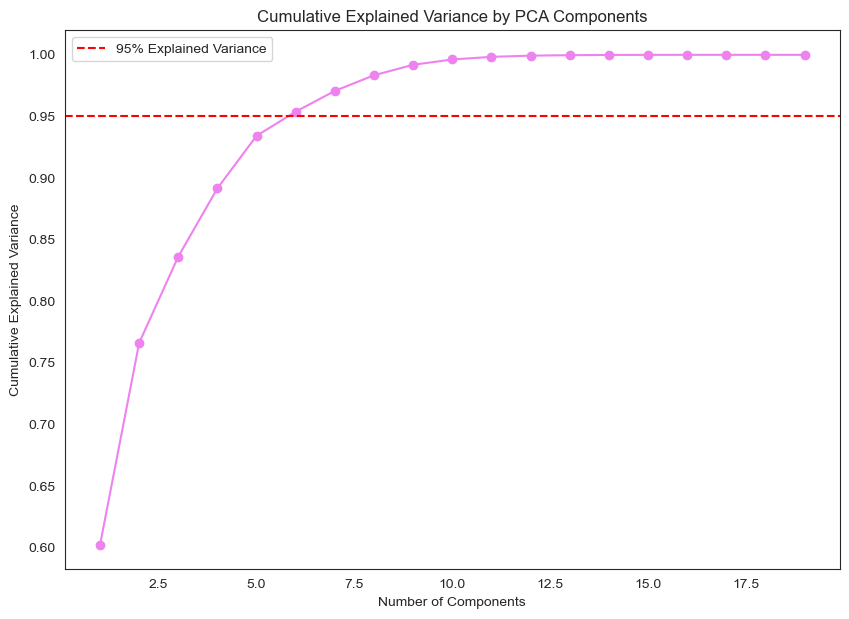

    Component  Cumulative Variance
0           1             0.602335
1           2             0.766254
2           3             0.836310
3           4             0.891731
4           5             0.934285
5           6             0.953883
6           7             0.970726
7           8             0.983403
8           9             0.991904
9          10             0.996228
10         11             0.998348
11         12             0.999315
12         13             0.999719
13         14             0.999899
14         15             0.999967
15         16             0.999989
16         17             1.000000
17         18             1.000000
18         19             1.000000


In [138]:
# To recduce the dimentionality, but keep most of the explained variance (95%), 
# - I calculate the number of the Principal Components that will be included in the final PCA. 

# Plotting cumulative explained variance plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='violet')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()


# Creating a DataFrame for the cumulative variance to show the excact values 
cumulative_variance_df = pd.DataFrame({
    'Component': range(1, len(cumulative_variance) + 1),
    'Cumulative Variance': cumulative_variance
})

# Displaying the DataFrame
print(cumulative_variance_df)

### Around six Principal Components needs to be incuded in the analysis to show the majority(95%) of the variation within the dataframe. 

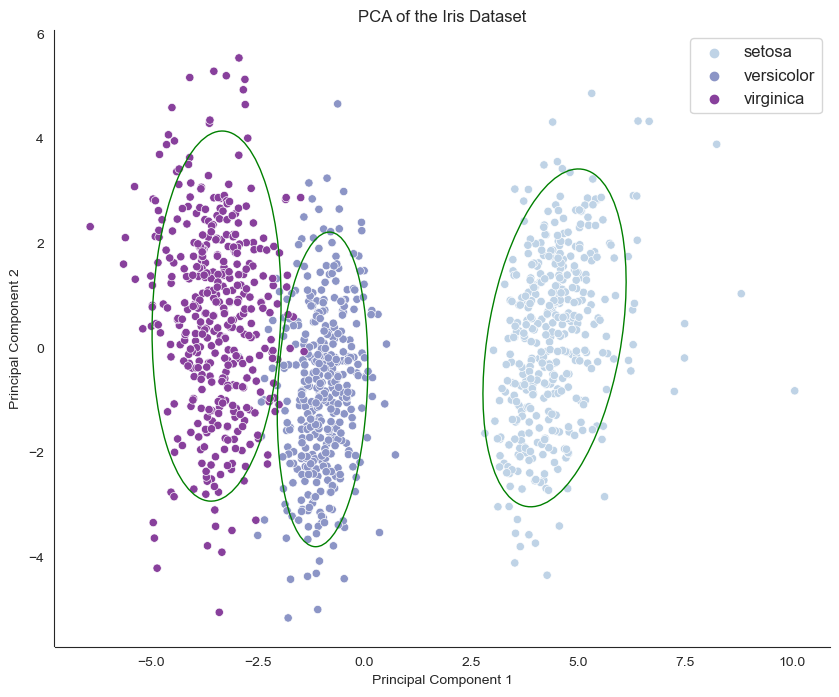

In [186]:
# Cutting the number of omponents and running the PCA:

# Setting the number of components needed for 95% variance
num_components_95_variance = (cumulative_variance >= 0.95).argmax() + 1
pca_6 = PCA(n_components=num_components_95_variance)
pca_6_components = pca_6.fit_transform(pca_data_scaled)

# Creating a DataFrame for the PCA components
pca_6_components_df = pd.DataFrame(data=pca_6_components, columns=[f'PC{i+1}' for i in range(num_components_95_variance)])
pca_6_components_df['species'] = data['species']

# Creating a scatter plot with species differentiation (hue)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_6_components_df, palette='BuPu', marker='o')

# Drawing 95% confidence ellipses (where 95 percent of the points fall within for the species)
for species in pca_6_components_df['species'].unique():
    species_data = pca_6_components_df[pca_6_components_df['species'] == species]
    mean = species_data[['PC1', 'PC2']].mean().values
    cov = np.cov(species_data[['PC1', 'PC2']], rowvar=False)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = patches.Ellipse(xy=(mean[0], mean[1]), 
                          width=lambda_[0]*2*1.96, height=lambda_[1]*2*1.96, 
                          angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ell.set_edgecolor('green')
    plt.gca().add_artist(ell)

# Adjusting legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, loc='best', fontsize='12') 
sns.despine(offset=True, trim=False)

# Other plot settings
plt.title('PCA of the Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)

plt.show()

### The PCA created three clusters for the three species. We can see that I. setosa differs the greatest
### from the two other  species, with I. virginica being the most distant. Allthough there is still intermixing,
### the overlapping of I. virginica and I. versicolor is significantly reduced.

# PCA Petal measurements

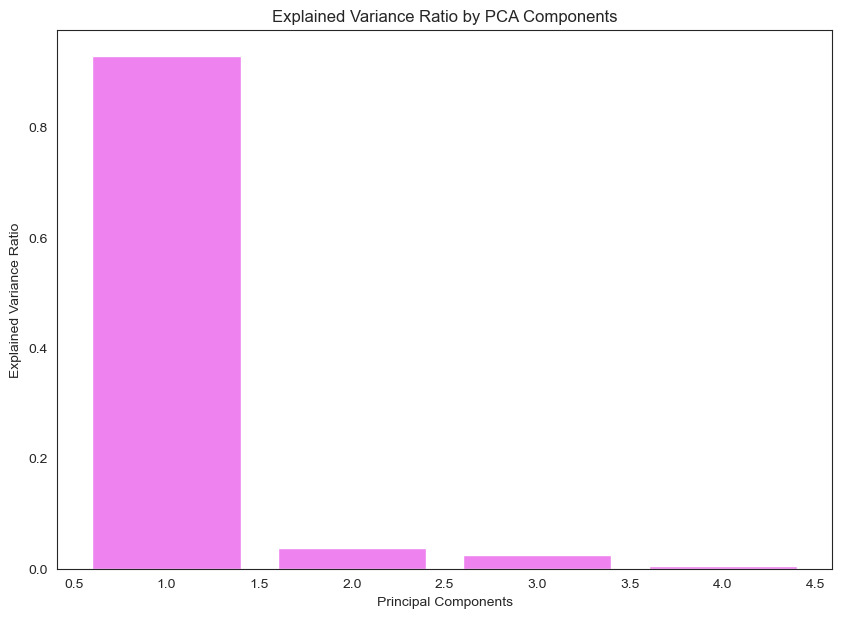

In [142]:
# Selecting numerical features
petal_features = ['petal_length', 'petal_width', 'petal_area', 'petal_curvature_mm']
pca_data = data[petal_features]

# Standardizing the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Applying PCA
pca = PCA()
pca.fit(pca_data_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Cumulative Variance Explained
cumulative_variance = np.cumsum(explained_variance)

# Explained variance ratio plot
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='violet')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by PCA Components')
plt.show()

### The first copmponent explains the majority of the variation. 

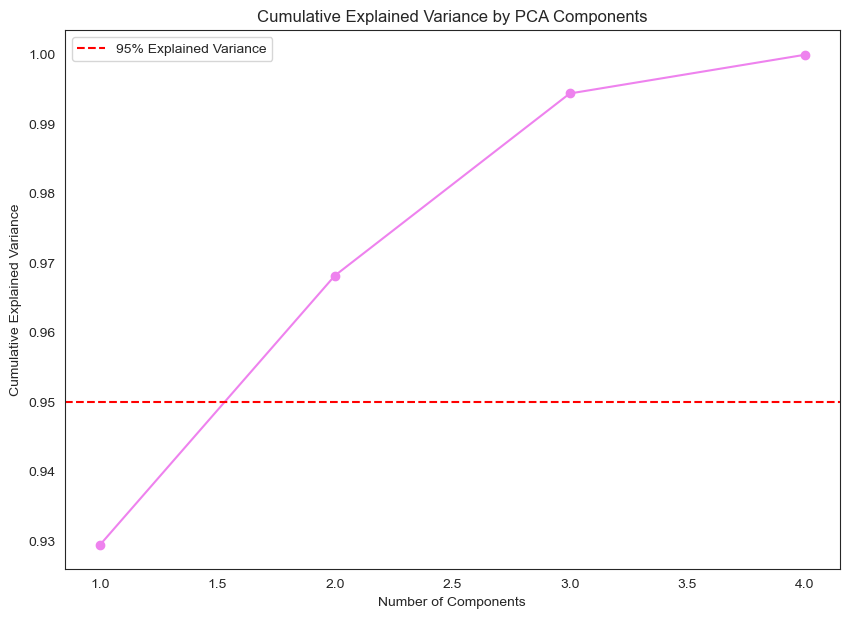

   Component  Cumulative Variance
0          1             0.929472
1          2             0.968223
2          3             0.994432
3          4             1.000000


In [144]:
# Cumulative explained variance plot
plt.figure(figsize=(10, 7))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='violet')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()

# Creating a DataFrame for the cumulative variance
cumulative_variance_df = pd.DataFrame({
    'Component': range(1, len(cumulative_variance) + 1),
    'Cumulative Variance': cumulative_variance
})

# Displaying the DataFrame
print(cumulative_variance_df)

### Two componenents explains 97% of the variance. 

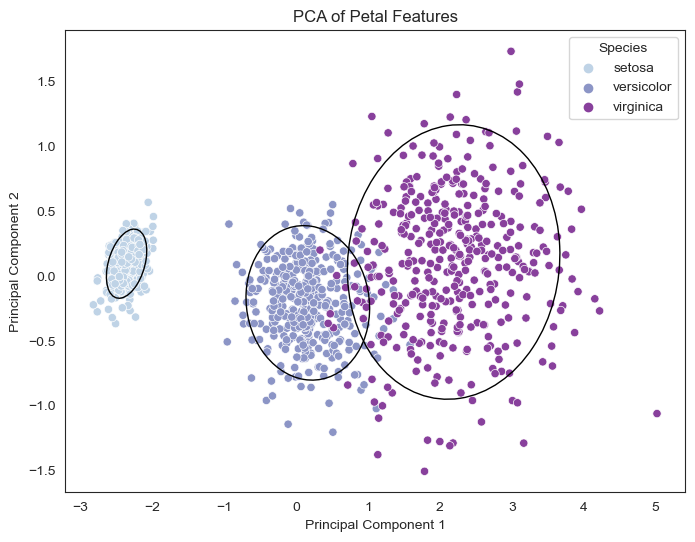

In [184]:

# Defining petal features
petal_features = ['petal_length', 'petal_width', 'petal_area', 'petal_curvature_mm']

# Selecting petal features from the dataset
petal_data = data[petal_features]

# Standardizing the petal data
scaler = StandardScaler()
petal_data_scaled = scaler.fit_transform(petal_data)

# Applying PCA to the petal features
pca_petal = PCA(n_components=2)
principal_components_petal = pca_petal.fit_transform(petal_data_scaled)

# Function to draw 95% confidence ellipses for PCA components
def draw_confidence_ellipse(mean, cov, ax, n_std=1.96):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # Only consider the largest two eigenvalues and corresponding eigenvectors
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order][:2], eigenvectors[:, order][:, :2]
    width, height = 2 * n_std * np.sqrt(eigenvalues)
    angle = np.rad2deg(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='black', facecolor='none')
    ax.add_patch(ellipse)

# Plotting the PCA results with species as hue
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=principal_components_petal[:, 0], y=principal_components_petal[:, 1], hue=data['species'], palette='BuPu')
plt.title('PCA of Petal Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Draw confidence ellipses for each species
for species in data['species'].unique():
    species_data = principal_components_petal[data['species'] == species]
    mean = np.mean(species_data, axis=0)
    cov = np.cov(species_data, rowvar=False)
    draw_confidence_ellipse(mean, cov, ax)

plt.legend(title='Species')
plt.show()


### The PCA created three clusters for the three species. As in the last PCA where all numerical features were incuded, we can see the same clusters, with I. setosa differing the greatest from the two other species. We can observe overlapping of the species  I. versicolor and I. virginica. The overlapping is greater than when incuding all the numerical values in the PCA calculation. 